In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/pbhagwat/DEV/CohortAnalysis/Cohort-Analysis/Data/Telco-Customer-Churn.csv')

In [3]:
pd.set_option('display.max_columns', 100)

In [131]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
dummies = pd.get_dummies(
    df[[ 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn' ]]
)

In [7]:
dummies.head()

,SeniorCitizen,tenure,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,0,34,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,0,2,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,45,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,0,2,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1


In [8]:
dummies = dummies[['gender_Female', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check','Churn_Yes']]

In [41]:
data = dummies.join(df[['customerID','MonthlyCharges', 'TotalCharges','tenure']])

In [42]:
data.set_index('customerID', inplace=True)
data['TotalCharges'] = data[['TotalCharges']].replace([' '], '0')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [43]:
data.head(n=10)

,gender_Female,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,Churn_Yes,MonthlyCharges,TotalCharges,tenure
customerID,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,29.85,29.85,1
5575-GNVDE,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,56.95,1889.50,34
3668-QPYBK,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,53.85,108.15,2
7795-CFOCW,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,1,0,0,0,42.30,1840.75,45
9237-HQITU,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,70.70,151.65,2
9305-CDSKC,1,0,0,1,1,0,1,0,1,0,1,1,0,0,1,0,0,1,1,99.65,820.50,8
1452-KIOVK,0,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,89.10,1949.40,22
6713-OKOMC,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,29.75,301.90,10
7892-POOKP,1,1,0,1,1,0,1,0,1,1,1,1,0,0,1,0,0,1,1,104.80,3046.05,28


In [44]:
from lifelines import CoxPHFitter 
from sklearn.cross_validation import train_test_split

In [238]:
x_select = ['gender_Female', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check','MonthlyCharges', 'TotalCharges','tenure', 'Churn_Yes']

In [239]:
cph_train, cph_test = train_test_split(data[x_select], test_size=0.2)

In [240]:
cph = CoxPHFitter()
cph.fit(cph_train, 'tenure', 'Churn_Yes')

<lifelines.CoxPHFitter: fitted with 5634 total observations, 4159 right-censored observations>

In [241]:
cph.print_summary()

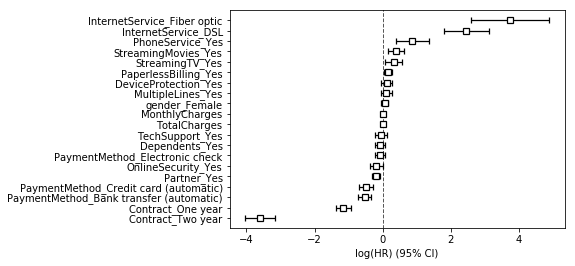

In [242]:
cph.plot()

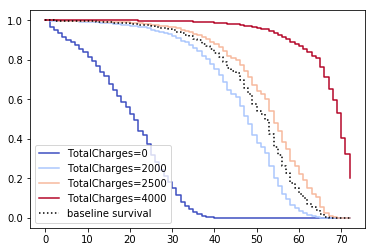

In [243]:
cph.plot_covariate_groups('TotalCharges', [0,2000,2500,4000], cmap='coolwarm')

## Churn Prediction
### Next step is to derive some insights and to make predictions of the existing customer behaviour 

In [244]:
# censored observation is one which is yet to have an ‘event’, i.e. customers who are yet to churn.
censored_subjects = data.loc[data['Churn_Yes']==0] 
print("Number of customers yet to churn:", len(censored_subjects))

Number of customers yet to churn: 5174


In [245]:
# predict_survival_function() creates the matrix containing a survival probability for each remaining customers 
#'unconditioned' survival function 'cuz some of these curves will predict churn before the customer's current tenure time
# row index => tenure period; column_index is the data index where Churn_Yes=0
unconditioned_sf = cph.predict_survival_function(censored_subjects)

In [246]:
unconditioned_sf.head()

,7590-VHVEG,5575-GNVDE,7795-CFOCW,1452-KIOVK,6713-OKOMC,6388-TABGU,9763-GRSKD,7469-LKBCI,8091-TTVAX,5129-JLPIS,3655-SNQYZ,8191-XWSZG,9959-WOFKT,4183-MYFRB,1680-VDCWW,3638-WEABW,6322-HRPFA,6865-JZNKO,5248-YGIJN,3841-NFECX,4929-XIHVW,6827-IEAUQ,7310-EGVHZ,3413-BMNZE,6234-RAAPL,6572-ADKRS,8865-TNMNX,9489-DEDVP,9867-JCZSP,4671-VJLCL,4080-IIARD,3714-NTNFO,5948-UJZLF,7639-LIAYI,2954-PIBKO,8012-SOUDQ,6575-SUVOI,4667-QONEA,8769-KKTPH,5067-XJQFU,3957-SQXML,5954-BDFSG,0434-CSFON,1215-FIGMP,0526-SXDJP,0557-ASKVU,5122-CYFXA,8627-ZYGSZ,3410-YOQBQ,3170-NMYVV,...,1904-WAJAA,5130-YPIRV,2843-CQMEG,6439-PKTRR,5351-QESIO,5568-DMXZS,8468-FZTOE,6633-SYEUS,6447-GORXK,6967-PEJLL,5981-ZVXOT,1684-FLBGS,1389-WNUIB,0376-OIWME,0218-QNVAS,0804-YGEQV,7164-BPTUT,2523-EWWZL,0928-XUTSN,0052-YNYOT,9586-JGQKH,4501-VCPFK,6075-SLNIL,9347-AERRL,2274-XUATA,6691-CCIHA,1685-BQULA,9053-EJUNL,0666-UXTJO,1471-GIQKQ,4807-IZYOZ,9710-NJERN,9837-FWLCH,7203-OYKCT,1035-IPQPU,7398-LXGYX,2823-LKABH,0550-DCXLH,9281-CEDRU,2235-DWLJU,0871-OPBXW,3605-JISKB,9767-FFLEM,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,3186-AJIEK
0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1.0,0.966775,0.998447,0.999632,0.979483,0.979522,0.999939,0.971265,0.999928,0.999976,0.986506,1.0,0.999503,1.0,0.956140,0.999181,0.999993,0.999642,0.994415,1.0,1.0,0.635188,0.998702,0.995774,0.947924,1.0,0.998692,0.988772,0.999999,0.999015,0.999998,0.972632,0.998292,0.918586,0.999995,0.999998,0.998161,0.994779,0.999976,0.999992,0.999996,0.999972,1.0,0.999333,0.999914,0.999995,0.995562,0.842935,0.999589,0.999859,0.999978,...,0.999804,0.999997,0.983215,1.000000,0.967787,0.934218,0.999999,0.988233,0.994004,0.999164,0.998952,0.993147,0.997370,0.996688,0.999998,0.999689,0.999998,0.985745,0.865270,0.999722,1.000000,0.992308,0.998236,0.999461,0.999999,0.999998,0.998466,0.997677,0.995797,0.913040,0.999975,0.999942,0.995843,0.999997,0.999959,0.999137,0.959243,0.951668,0.999998,0.939821,0.991410,0.999918,0.995484,0.963112,0.990800,0.999984,0.997096,0.999998,0.984196,1.000000
2.0,0.951617,0.997721,0.999460,0.970032,0.970089,0.999911,0.958110,0.999894,0.999965,0.980258,1.0,0.999271,1.0,0.936292,0.998798,0.999989,0.999475,0.991813,1.0,1.0,0.513713,0.998096,0.993804,0.924508,1.0,0.998081,0.983564,0.999999,0.998554,0.999998,0.960090,0.997495,0.882817,0.999992,0.999997,0.997302,0.992346,0.999965,0.999989,0.999994,0.999959,1.0,0.999021,0.999873,0.999993,0.993493,0.778194,0.999397,0.999793,0.999967,...,0.999712,0.999996,0.975462,0.999999,0.953079,0.904956,0.999999,0.982777,0.991212,0.998773,0.998462,0.989958,0.996143,0.995143,0.999997,0.999543,0.999997,0.979147,0.808645,0.999592,0.999999,0.988731,0.997412,0.999209,0.999999,0.999998,0.997749,0.996593,0.993838,0.875006,0.999963,0.999915,0.993905,0.999996,0.999939,0.998733,0.940756,0.929871,0.999997,0.912932,0.987418,0.999880,0.993378,0.946330,0.986526,0.999977,0.995740,0.999997,0.976890,1.000000
3.0,0.936333,0.996978,0.999283,0.960444,0.960519,0.999881,0.944817,0.999859,0.999953,0.973897,1.0,0.999033,1.0,0.916384,0.998406,0.999986,0.999304,0.989155,1.0,1.0,0.413307,0.997475,0.991789,0.901117,1.0,0.997455,0.978257,0.999998,0.998083,0.999997,0.947408,0.9

In [247]:
# We've to condition the prediction on the basis that the customers were still with us when the data was collected
# c.name => row number(index) of the data where Churn_Yes=0
# data.loc[c.name, 'tenure'] => tenure value of specific index(c.name) in original data
# c.loc[data.loc[c.name, 'tenure']]<=1 always in unconditioned_cf, which may not be true cuz the customers might continue using the platform even after the date of collection of data
conditioned_sf = unconditioned_sf.apply(lambda c:(c/c.loc[data.loc[c.name, 'tenure']]).clip_upper(1))

In [248]:
conditioned_sf.head()

,7590-VHVEG,5575-GNVDE,7795-CFOCW,1452-KIOVK,6713-OKOMC,6388-TABGU,9763-GRSKD,7469-LKBCI,8091-TTVAX,5129-JLPIS,3655-SNQYZ,8191-XWSZG,9959-WOFKT,4183-MYFRB,1680-VDCWW,3638-WEABW,6322-HRPFA,6865-JZNKO,5248-YGIJN,3841-NFECX,4929-XIHVW,6827-IEAUQ,7310-EGVHZ,3413-BMNZE,6234-RAAPL,6572-ADKRS,8865-TNMNX,9489-DEDVP,9867-JCZSP,4671-VJLCL,4080-IIARD,3714-NTNFO,5948-UJZLF,7639-LIAYI,2954-PIBKO,8012-SOUDQ,6575-SUVOI,4667-QONEA,8769-KKTPH,5067-XJQFU,3957-SQXML,5954-BDFSG,0434-CSFON,1215-FIGMP,0526-SXDJP,0557-ASKVU,5122-CYFXA,8627-ZYGSZ,3410-YOQBQ,3170-NMYVV,...,1904-WAJAA,5130-YPIRV,2843-CQMEG,6439-PKTRR,5351-QESIO,5568-DMXZS,8468-FZTOE,6633-SYEUS,6447-GORXK,6967-PEJLL,5981-ZVXOT,1684-FLBGS,1389-WNUIB,0376-OIWME,0218-QNVAS,0804-YGEQV,7164-BPTUT,2523-EWWZL,0928-XUTSN,0052-YNYOT,9586-JGQKH,4501-VCPFK,6075-SLNIL,9347-AERRL,2274-XUATA,6691-CCIHA,1685-BQULA,9053-EJUNL,0666-UXTJO,1471-GIQKQ,4807-IZYOZ,9710-NJERN,9837-FWLCH,7203-OYKCT,1035-IPQPU,7398-LXGYX,2823-LKABH,0550-DCXLH,9281-CEDRU,2235-DWLJU,0871-OPBXW,3605-JISKB,9767-FFLEM,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,3186-AJIEK
0.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2.0,0.984321,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,0.998021,0.975297,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.984803,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.958343,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3.0,0.968512,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.804549,1.0,0.995998,0.950621,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.960124,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.969472,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.917462,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.995875,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4.0,0.952106,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.639583,1.0,0.993868,0.925260,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.919771,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.917234,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.953554,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.876216,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.991540,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [249]:
import matplotlib.pyplot as plt

In [250]:
customer = '5575-GNVDE'

In [251]:
df.loc[df['customerID'] == customer]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


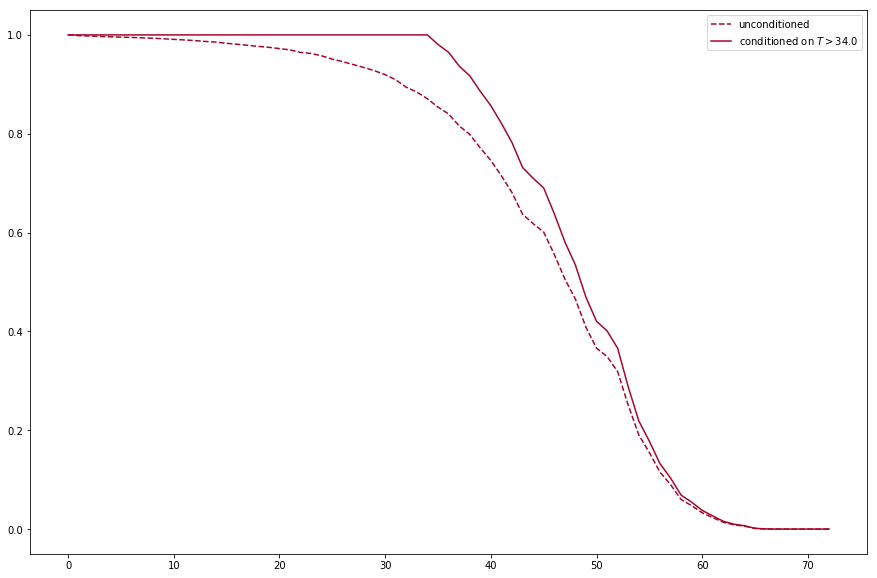

In [252]:
# investigate individual customers and see how the conditioning has affected their survival over the base line
plt.figure(figsize=(15, 10))
subject = customer
unconditioned_sf[subject].plot(ls="--", color="#A60628", label="unconditioned") 
conditioned_sf[subject].plot(color="#A60628", label=("conditioned on $T>%s$" % data.loc[subject]['tenure'])) # T>34 indicate that the customer is active even after 58 months
plt.legend()

In [253]:
from lifelines.utils import median_survival_times, qth_survival_times

In [254]:
# Predict the month number where the survival chance of customer is 50%
# This can also be modified as predictions_50 = qth_survival_times(.50, conditioned_sf), where the percentile can be modified depending on our requirement 
predictions_50 = median_survival_times(conditioned_sf) 
# predictions_10 = qth_survival_times(.10, conditioned_sf) #This provides the month where survival chance of customer is 10%

In [255]:
predictions_50

,7590-VHVEG,5575-GNVDE,7795-CFOCW,1452-KIOVK,6713-OKOMC,6388-TABGU,9763-GRSKD,7469-LKBCI,8091-TTVAX,5129-JLPIS,3655-SNQYZ,8191-XWSZG,9959-WOFKT,4183-MYFRB,1680-VDCWW,3638-WEABW,6322-HRPFA,6865-JZNKO,5248-YGIJN,3841-NFECX,4929-XIHVW,6827-IEAUQ,7310-EGVHZ,3413-BMNZE,6234-RAAPL,6572-ADKRS,8865-TNMNX,9489-DEDVP,9867-JCZSP,4671-VJLCL,4080-IIARD,3714-NTNFO,5948-UJZLF,7639-LIAYI,2954-PIBKO,8012-SOUDQ,6575-SUVOI,4667-QONEA,8769-KKTPH,5067-XJQFU,3957-SQXML,5954-BDFSG,0434-CSFON,1215-FIGMP,0526-SXDJP,0557-ASKVU,5122-CYFXA,8627-ZYGSZ,3410-YOQBQ,3170-NMYVV,...,1904-WAJAA,5130-YPIRV,2843-CQMEG,6439-PKTRR,5351-QESIO,5568-DMXZS,8468-FZTOE,6633-SYEUS,6447-GORXK,6967-PEJLL,5981-ZVXOT,1684-FLBGS,1389-WNUIB,0376-OIWME,0218-QNVAS,0804-YGEQV,7164-BPTUT,2523-EWWZL,0928-XUTSN,0052-YNYOT,9586-JGQKH,4501-VCPFK,6075-SLNIL,9347-AERRL,2274-XUATA,6691-CCIHA,1685-BQULA,9053-EJUNL,0666-UXTJO,1471-GIQKQ,4807-IZYOZ,9710-NJERN,9837-FWLCH,7203-OYKCT,1035-IPQPU,7398-LXGYX,2823-LKABH,0550-DCXLH,9281-CEDRU,2235-DWLJU,0871-OPBXW,3605-JISKB,9767-FFLEM,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,3186-AJIEK
0.5,22.0,49.0,61.0,31.0,27.0,71.0,25.0,69.0,inf,34.0,inf,60.0,inf,26.0,53.0,inf,62.0,40.0,inf,inf,6.0,49.0,39.0,18.0,inf,54.0,32.0,inf,52.0,inf,26.0,54.0,15.0,inf,inf,51.0,39.0,inf,inf,inf,inf,inf,57.0,70.0,inf,40.0,11.0,60.0,66.0,inf,...,65.0,inf,32.0,inf,22.0,18.0,inf,34.0,40.0,54.0,53.0,37.0,43.0,45.0,inf,62.0,inf,34.0,17.0,69.0,inf,37.0,49.0,56.0,inf,inf,50.0,49.0,43.0,14.0,inf,70.0,40.0,inf,72.0,55.0,25.0,22.0,inf,18.0,34.0,69.0,44.0,26.0,34.0,inf,43.0,inf,30.0,inf


In [256]:
predictions_50[[customer]]

,5575-GNVDE
0.5,49.0


In [257]:
# Investigate the predicted remeaining value that a customer has for the business 
values = predictions_50.T.join(data[['MonthlyCharges','tenure']])
values['RemainingValue'] = values['MonthlyCharges'] * (values[0.5] - values['tenure']) # With this we can predict which customers might inflict the highest damage to the business

In [258]:
values.loc[[customer]]

,0.5,MonthlyCharges,tenure,RemainingValue
5575-GNVDE,49.0,56.95,34,854.25


## Churn prevention - What can we do to keep them?
### Here we need to understang how much we can spend to keep the customers 

In [259]:
# Through coefficient chart we concluded that these 4 features i.e. Contract_Two year, Contract_One year, PaymentMethod_Credit card (automatic), PaymentMethod_Bank transfer (automatic)
# promotes the survival chances positively, so let's focus on those i.e reverse the existing values and see the resulting survival chances

upgrades = ['PaymentMethod_Credit card (automatic)', 'PaymentMethod_Bank transfer (automatic)', 'Contract_One year', 'Contract_Two year']
results_dict = {}

# Run this for all the customers 
actual = data.loc[[customer]]
change = data.loc[[customer]]
results_dict[customer] = [cph.predict_median(actual)]
for upgrade in upgrades:
    change[upgrade] = 1 if list(change[upgrade]) == [0] else 0
    results_dict[customer].append(cph.predict_median(change))
    change[upgrade] = 1 if list(change[upgrade]) == [0] else 0

In [260]:
results_dict

{'5575-GNVDE': [48.0, 52.0, 53.0, 38.0, 71.0]}

In [261]:
result_df = pd.DataFrame(results_dict).T
result_df.columns = ['baseline'] + upgrades
actions = values.join(result_df).drop([0.5], axis=1)

In [262]:
data.loc[[customer],upgrades]

,PaymentMethod_Credit card (automatic),PaymentMethod_Bank transfer (automatic),Contract_One year,Contract_Two year
customerID,,,,
5575-GNVDE,0,0,1,0


In [263]:
# Notice that if we get the 1st customer to use CC we increase the survival period of cust '5575-GNVDE' by 5 months i.e. 46(baseline) -> 51(PaymentMethod_Credit card (automatic)) and so on..
# Note: Cust 5575-GNVDE was already having Contract_One year, after reverting it we can see that the survival chances goes down from 46 to 37
actions.loc[[customer]]

,MonthlyCharges,tenure,RemainingValue,baseline,PaymentMethod_Credit card (automatic),PaymentMethod_Bank transfer (automatic),Contract_One year,Contract_Two year
5575-GNVDE,56.95,34,854.25,48.0,52.0,53.0,38.0,71.0


##### Calculate what impact it has financially 

In [264]:
actions['CreditCard Diff'] = (actions['PaymentMethod_Credit card (automatic)'] - actions['baseline']) * actions['MonthlyCharges'] 
actions['BankTransfer Diff'] = (actions['PaymentMethod_Bank transfer (automatic)'] - actions['baseline']) * actions['MonthlyCharges']
actions['1yrContract Diff'] = (actions['Contract_One year'] - actions['baseline']) * actions['MonthlyCharges']
actions['2yrContract Diff'] = (actions['Contract_Two year'] - actions['baseline']) * actions['MonthlyCharges']

In [265]:
actions.loc[[customer]]

,MonthlyCharges,tenure,RemainingValue,baseline,PaymentMethod_Credit card (automatic),PaymentMethod_Bank transfer (automatic),Contract_One year,Contract_Two year,CreditCard Diff,BankTransfer Diff,1yrContract Diff,2yrContract Diff
5575-GNVDE,56.95,34,854.25,48.0,52.0,53.0,38.0,71.0,227.8,284.75,-569.5,1309.85


### Accuracy and Calibration
#### Calibration is the propensity of the model to get probabilities right over time (i.e. having high recall value)

In [266]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss
import numpy as np

In [267]:
cph_test.head()

,gender_Female,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,MonthlyCharges,TotalCharges,tenure,Churn_Yes
customerID,,,,,,,,,,,,,,,,,,,,,,
9961-JBNMK,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,96.80,2030.30,21,1
2135-DQWAQ,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,85.30,420.45,5,0
1963-SVUCV,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,45.30,45.30,1,1
1285-OKIPP,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,79.90,79.90,1,1
3908-MKIMJ,0,1,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,1,41.95,2965.75,68,0


Text(0.5, 1.0, 'Calibration plots (reliability curve)')

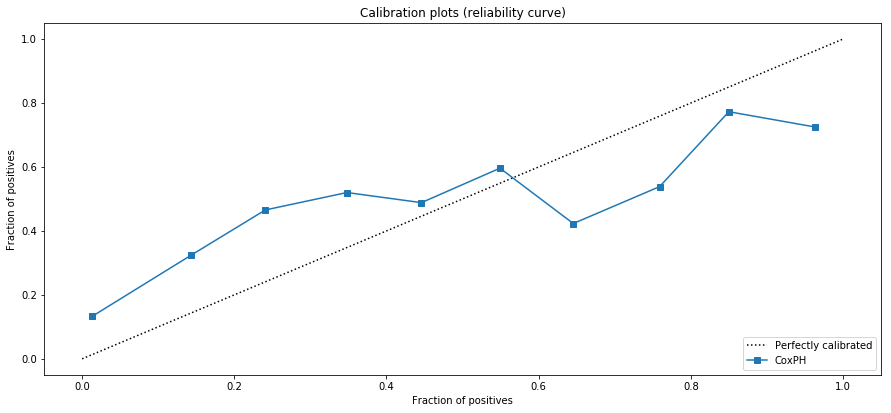

In [268]:
plt.figure(figsize=(15, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2) 
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated") 

probs = 1-np.array(cph.predict_survival_function(cph_test).loc[13]) # here tenure=13

actual = cph_test['Churn_Yes']

fraction_of_positives, mean_predicted_value = calibration_curve(actual, probs, n_bins=10, normalize=False) 

ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s" % ("CoxPH"))

ax1.set_ylabel("Fraction of positives") 
ax1.set_ylim([-0.05, 1.05]) 
ax1.set_xlabel("Fraction of positives") 
ax1.legend(loc="lower right") 
ax1.set_title('Calibration plots (reliability curve)')

In [269]:
# To understand how far away the line is from the perfect calibration we use brier_score_loss
brier_score_loss(cph_test['Churn_Yes'], 1-np.array(cph.predict_survival_function(cph_test).loc[13]), pos_label=1)

0.17293230530718695

<Figure size 1440x720 with 0 Axes>

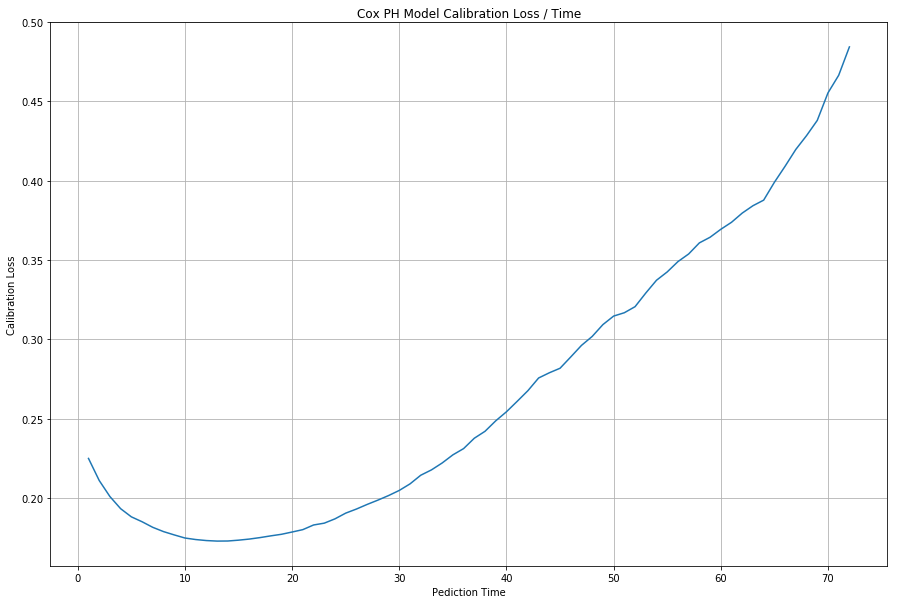

In [270]:
# Inspect the calibration of the model at all the time periods (above one is just for tenure=13)
plt.figure(figsize=(20, 10))
loss_dict = {}
for i in range(1,73):
    score=brier_score_loss(cph_test['Churn_Yes'], 1-np.array(cph.predict_survival_function(cph_test).loc[i]), pos_label=1)
    loss_dict[i] = [score]
    
loss_df = pd.DataFrame(loss_dict).T

fig,ax = plt.subplots(figsize=(15, 10))
ax.plot(loss_df.index, loss_df)
ax.set(xlabel='Pediction Time', ylabel='Calibration Loss', title='Cox PH Model Calibration Loss / Time')
ax.grid()

# Here we can see that the model is well caliberated b/w 5 and 25 months
plt.show() 

In [271]:
# upper and lower bounds for the expected return on investment from getting customers to make changes
loss_df.columns = ['loss'] 

temp_df = actions.reset_index().set_index('PaymentMethod_Credit card (automatic)').join(loss_df) 
temp_df = temp_df.set_index('index') 
actions['CreditCard Lower'] = temp_df['CreditCard Diff'] - (temp_df['loss'] * temp_df['CreditCard Diff']) 
actions['CreditCard Upper'] = temp_df['CreditCard Diff'] + (temp_df['loss'] * temp_df['CreditCard Diff']) 

temp_df = actions.reset_index().set_index('PaymentMethod_Bank transfer (automatic)').join(loss_df) 
temp_df = temp_df.set_index('index') 
actions['BankTransfer Lower'] = temp_df['BankTransfer Diff'] - (.5 * temp_df['loss'] * temp_df['BankTransfer Diff']) 
actions['BankTransfer Upper'] = temp_df['BankTransfer Diff'] + (.5 * temp_df['loss'] * temp_df['BankTransfer Diff']) 

temp_df = actions.reset_index().set_index('Contract_One year').join(loss_df) 
temp_df = temp_df.set_index('index') 
actions['1yrContract Lower'] = temp_df['1yrContract Diff'] - (.5 * temp_df['loss'] * temp_df['1yrContract Diff']) 
actions['1yrContract Upper'] = temp_df['1yrContract Diff'] + (.5 * temp_df['loss'] * temp_df['1yrContract Diff']) 

temp_df = actions.reset_index().set_index('Contract_Two year').join(loss_df) 
temp_df = temp_df.set_index('index') 
actions['2yrContract Lower'] = temp_df['2yrContract Diff'] - (.5 * temp_df['loss'] * temp_df['2yrContract Diff']) 
actions['2yrContract Upper'] = temp_df['2yrContract Diff'] + (.5 * temp_df['loss'] * temp_df['2yrContract Diff'])

In [272]:
actions.loc[[customer]]

,MonthlyCharges,tenure,RemainingValue,baseline,PaymentMethod_Credit card (automatic),PaymentMethod_Bank transfer (automatic),Contract_One year,Contract_Two year,CreditCard Diff,BankTransfer Diff,1yrContract Diff,2yrContract Diff,CreditCard Lower,CreditCard Upper,BankTransfer Lower,BankTransfer Upper,1yrContract Lower,1yrContract Upper,2yrContract Lower,2yrContract Upper
5575-GNVDE,56.95,34,854.25,48.0,52.0,53.0,38.0,71.0,227.8,284.75,-569.5,1309.85,154.752991,300.847009,237.872335,331.627665,-500.554601,-638.445399,1004.340862,1615.359138


### Code after this is not relevant

In [137]:
actions.loc[[customer], upgrades]

,PaymentMethod_Credit card (automatic),PaymentMethod_Bank transfer (automatic),Contract_One year,Contract_Two year
5575-GNVDE,51.0,50.0,37.0,71.0


In [139]:
actions.loc[['5575-GNVDE'], upgrades].T.index

Index(['PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Bank transfer (automatic)', 'Contract_One year',
       'Contract_Two year'],
      dtype='object')

In [184]:
source = actions.loc[['5575-GNVDE'], upgrades].T
source['upgrades'] = actions.loc[['5575-GNVDE'], upgrades].T.index
source['baseline'] = actions.loc['5575-GNVDE']['baseline']
source = source.rename(columns = {'5575-GNVDE':'Survival period(months)'})

In [185]:
source

,Survival period(months),upgrades,baseline
PaymentMethod_Credit card (automatic),51.0,PaymentMethod_Credit card (automatic),46.0
PaymentMethod_Bank transfer (automatic),50.0,PaymentMethod_Bank transfer (automatic),46.0
Contract_One year,37.0,Contract_One year,46.0
Contract_Two year,71.0,Contract_Two year,46.0


In [149]:
data.loc[subject]['tenure']

34.0

In [155]:
actions.loc[['5575-GNVDE'],['CreditCard Diff', 'BankTransfer Diff', '1yrContract Diff', '2yrContract Diff']].T

,5575-GNVDE
CreditCard Diff,284.75
BankTransfer Diff,227.80
1yrContract Diff,-512.55
2yrContract Diff,1423.75


In [171]:
dummy = actions.loc[['5575-GNVDE'],['CreditCard Diff', 'BankTransfer Diff', '1yrContract Diff', '2yrContract Diff']].T

In [172]:
dummy

,5575-GNVDE
CreditCard Diff,284.75
BankTransfer Diff,227.80
1yrContract Diff,-512.55
2yrContract Diff,1423.75


In [173]:
dummy.reset_index()

,index,5575-GNVDE
0,CreditCard Diff,284.75
1,BankTransfer Diff,227.80
2,1yrContract Diff,-512.55
3,2yrContract Diff,1423.75


In [168]:
actions.loc['5575-GNVDE']['RemainingValue'] 

797.3000000000001

In [162]:
actions

,MonthlyCharges,tenure,RemainingValue,baseline,PaymentMethod_Credit card (automatic),PaymentMethod_Bank transfer (automatic),Contract_One year,Contract_Two year,CreditCard Diff,BankTransfer Diff,1yrContract Diff,2yrContract Diff,CreditCard Lower,CreditCard Upper,BankTransfer Lower,BankTransfer Upper,1yrContract Lower,1yrContract Upper,2yrContract Lower,2yrContract Upper
7590-VHVEG,29.85,1,656.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5575-GNVDE,56.95,34,797.300000,46.0,51.0,50.0,37.0,71.0,284.75,227.8,-512.55,1423.75,194.453865,375.046135,192.25938,263.34062,-454.515588,-570.584412,1088.53094,1758.96906
7795-CFOCW,42.30,45,634.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1452-KIOVK,89.10,22,801.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6713-OKOMC,29.75,10,535.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6388-TABGU,56.15,62,505.350000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9763-GRSKD,49.95,13,599.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7469-LKBCI,18.95,16,1023.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8091-TTVAX,100.35,58,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5129-JLPIS,105.50,25,844.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
